In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd

# Active learning

In [2]:
# read results
eval_path = "/home/xianglin/projects/DVI_data/active_learning/random/resnet18/feedback.xlsx"
df = pd.read_excel(eval_path, index_col=0, dtype={"task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
# df = df.rename(columns={"rate": "labeled ratio"})

## feedback

In [6]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df = df.rename(columns={"rate": "labeled ratio"})
df_eval = df[(df.task=="feedback")&(df.tolerance==0.0)]

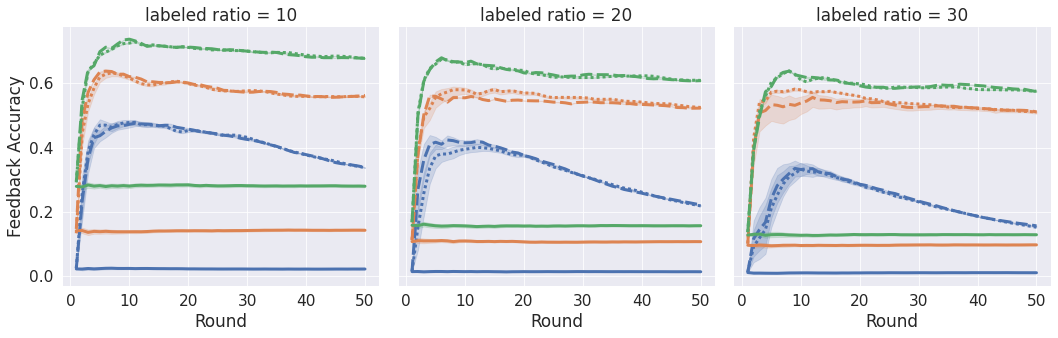

In [16]:
sns.set_theme()
sns.set_context("paper", font_scale=1.75, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="labeled ratio", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["Random", "DVI", "TimeVis"], kind="line", legend=False)
# sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
fg.set(xlabel='Round', ylabel='Feedback Accuracy')

fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation_feedback.pdf",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    # transparent=True,
)

## noise

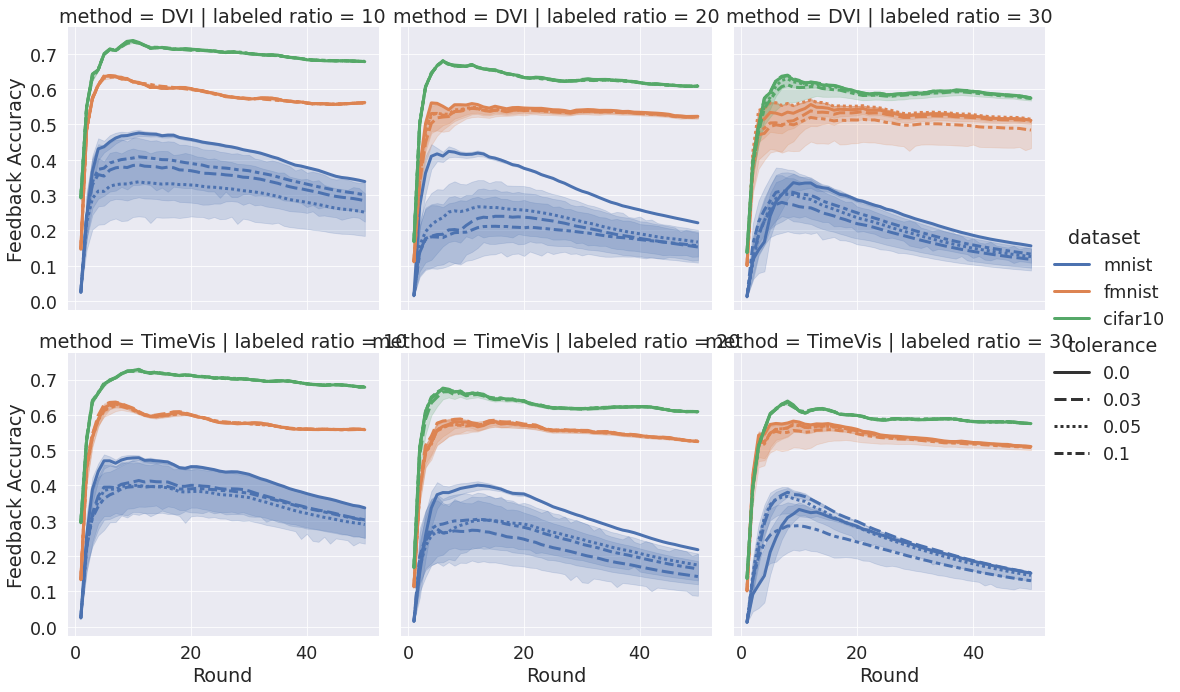

In [4]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_eval = df[(df.task=="feedback")&(df.tolerance<0.15)&(df.method!="Random")]
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval",col="labeled ratio", row="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", kind="line", legend="full")
# sns.move_legend(fg, "right", bbox_to_anchor=(0,0), title=None, frameon=True)
fg.set(xlabel='Round', ylabel='Feedback Accuracy')
fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation_noise.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)

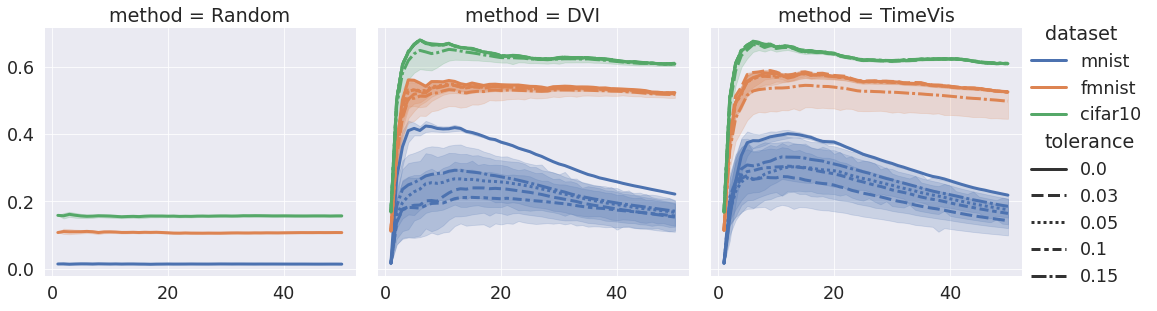

In [11]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_eval = df[(df.task=="feedback")&(df.rate==20)]
pal20c = sns.color_palette('tab20c', 20)
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", kind="line", legend="full")
# fg = sns.lineplot(data=df_eval, x="iter", y="eval", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["DVI", "TimeVis","Random"], legend="full")
# sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
fg.set(xlabel='', ylabel='')
fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation_noise_20.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)

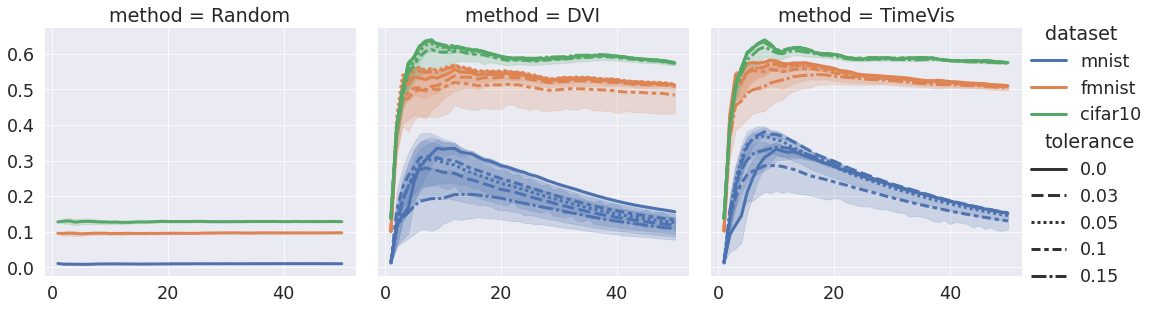

In [12]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_eval = df[(df.task=="feedback")&(df.rate==30)]
pal20c = sns.color_palette('tab20c', 20)
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", kind="line", legend="full")
# fg = sns.lineplot(data=df_eval, x="iter", y="eval", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["DVI", "TimeVis","Random"], legend="full")
# sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
fg.set(xlabel='', ylabel='')
fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation_noise_30.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)

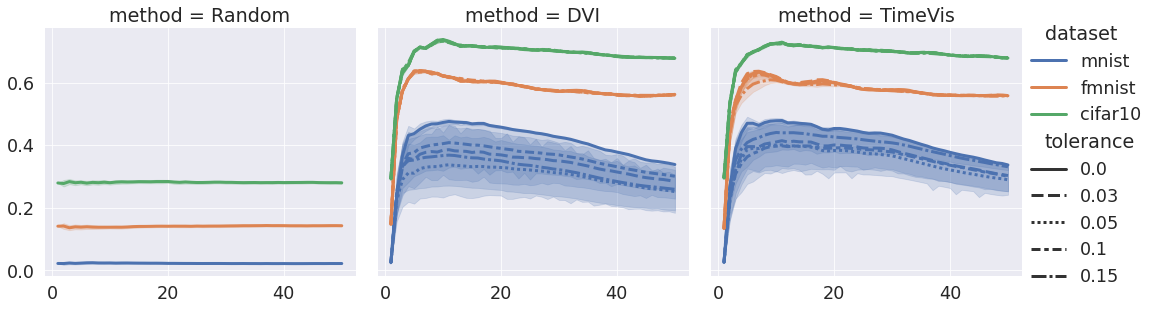

In [3]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_eval = df[(df.task=="feedback")&(df.rate==10)]
pal20c = sns.color_palette('tab20c', 20)
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", kind="line", legend="full")
# fg = sns.lineplot(data=df_eval, x="iter", y="eval", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["DVI", "TimeVis","Random"], legend="full")
# sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
fg.set(xlabel='', ylabel='')
fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation_noise_10.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)

## efficiency
box plot

In [12]:
df_eval = df[(df.task=="efficiency")&((df.iter==10)|(df.iter==25)|(df.iter==50))]

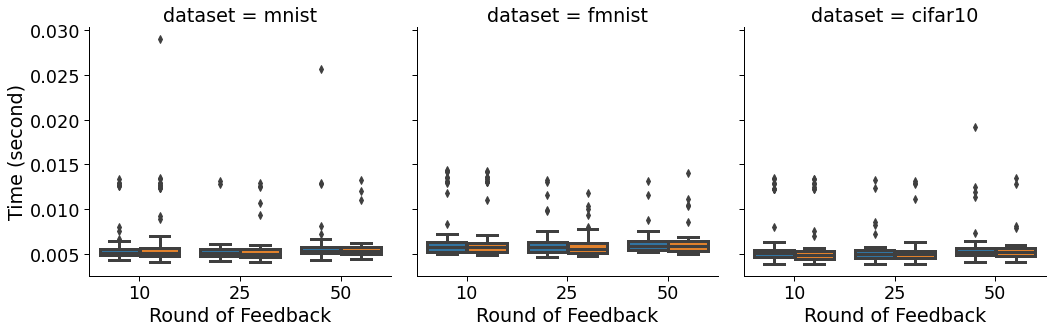

In [13]:
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.catplot(data=df_eval, x="iter", y="eval", col="dataset", hue="method", kind="box", legend=False)
# sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=1, title="Visualization Method", frameon=False)
fg.set(xlabel='Round of Feedback', ylabel='Time (second)')

fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation_efficiency.pdf",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)

In [3]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_al_eval = df[(df.task=="feedback")&(df.tolerance<0.15)&(df.rate==30)]
df_al_eval["Task"] = ["Misprediction in the wild"]*len(df_al_eval)

/home/xianglin/miniconda3/envs/SV/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# NOISE

In [14]:
# read results
eval_path = "/home/xianglin/projects/DVI_data/noisy/symmetric/feedback.xlsx"
df = pd.read_excel(eval_path, index_col=0, dtype={"task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
# df = df.rename(columns={"rate": "noise rate"})

In [6]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float
df_noise_eval = df[(df.task=="feedback")&(df.tolerance<0.15)&(df.rate==20)]
df_noise_eval["Task"] = ["Noisy samples"]*len(df_noise_eval)

## feedback

In [10]:
df_eval = df_al_eval.append(df_noise_eval, ignore_index=True)
df_eval = df_eval[df_eval.method!="Random"]

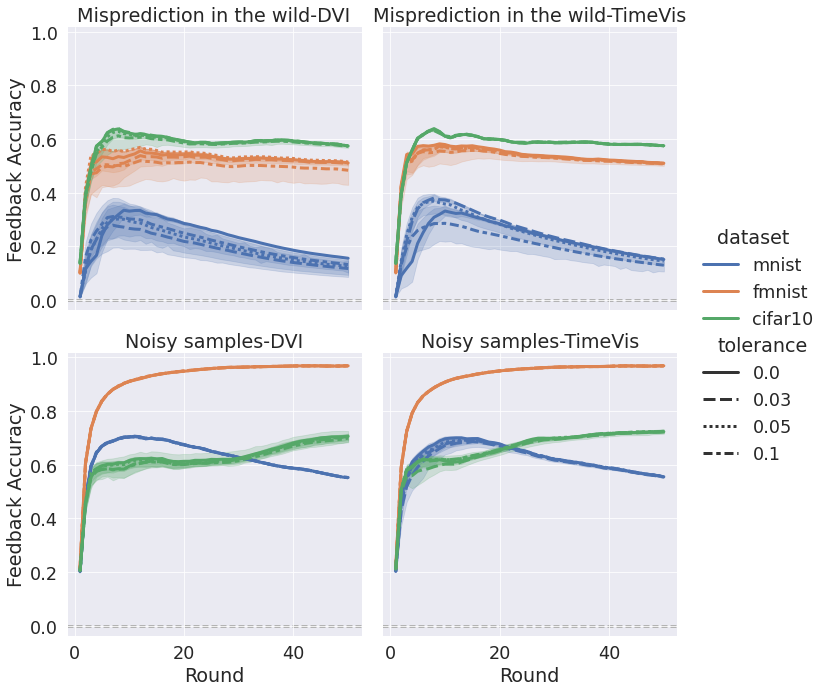

In [21]:
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval",row="Task", col="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", kind="line", legend="auto")
# sns.move_legend(fg,"" frameon=True)
# sns.move_legend(fg, "center right")
fg.set(xlabel='Round', ylabel='Feedback Accuracy')
(fg.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
  .set_titles("{row_name}-{col_name}")
#   .legend(frameon=True)
  )
fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation.pdf",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)

In [5]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float
# df = df.rename(columns={"rate": "noise rate"})
df_eval = df[(df.task=="feedback")&(df.tolerance==0.0)]

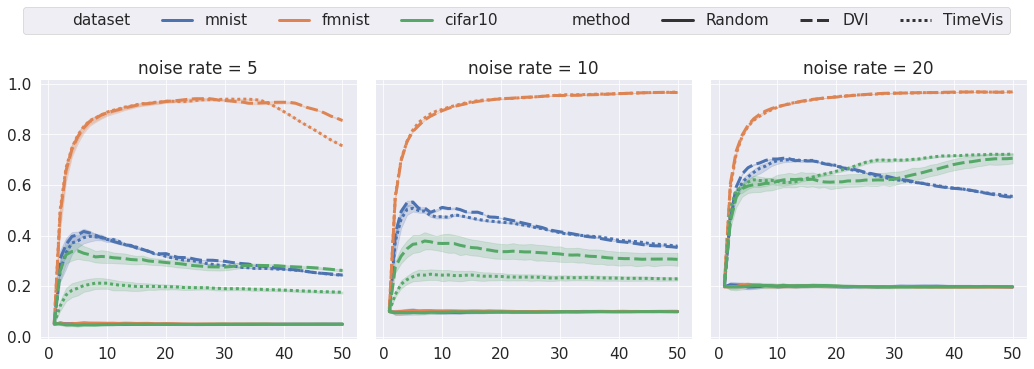

In [13]:
# pal20c = sns.color_palette('tab20c', 20)
sns.set_theme()
sns.set_context("paper", font_scale=1.75, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="noise rate", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["Random", "DVI", "TimeVis"], kind="line", legend="auto")
# fg = sns.lineplot(data=df_eval, x="iter", y="eval", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["Random", "DVI", "TimeVis"], legend="full")
sns.move_legend(fg, "lower center", bbox_to_anchor=(.465, 1), ncol=8, title=None, frameon=True)
fg.set(xlabel='', ylabel='')

fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation_feedback.pdf",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    # transparent=True,
)

## efficiency

In [7]:
# # "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float
df_eval = df[(df.task=="efficiency")&((df.iter==10)|(df.iter==25)|(df.iter==50))&(df.method!="Random")]

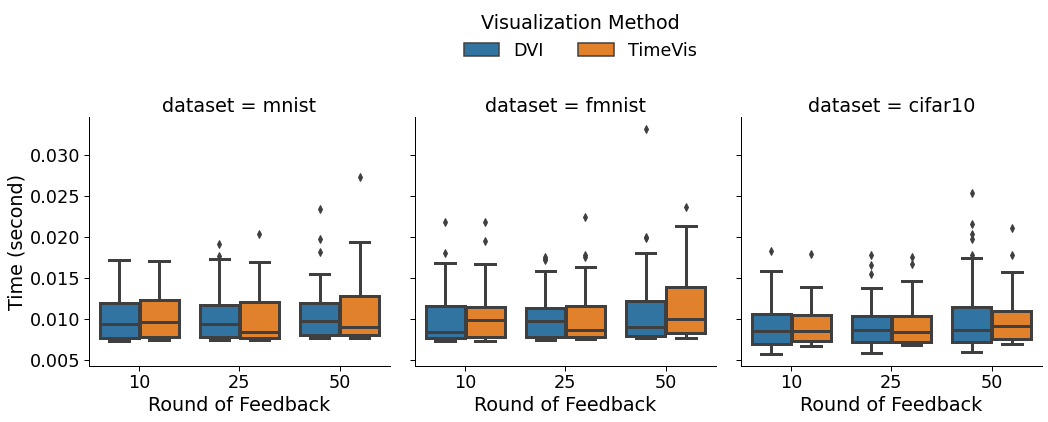

In [10]:
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.catplot(data=df_eval, x="iter", y="eval", col="dataset", hue="method", kind="box")
sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title="Visualization Method", frameon=False)
fg.set(xlabel='Round of Feedback', ylabel='Time (second)')

fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation_efficiency.pdf",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)

## noise

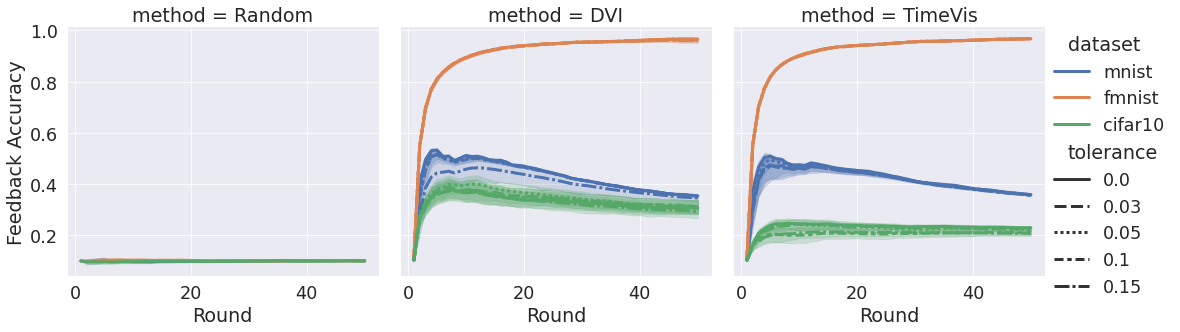

In [15]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_eval = df[(df.task=="feedback")&(df.rate==10)]
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", kind="line", legend="auto")
# sns.move_legend(fg, "center right", bbox_to_anchor=(0.8,1), ncol=9, title=None, frameon=True)
fg.set(xlabel='Round', ylabel='Feedback Accuracy')
fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation_noise_10.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)

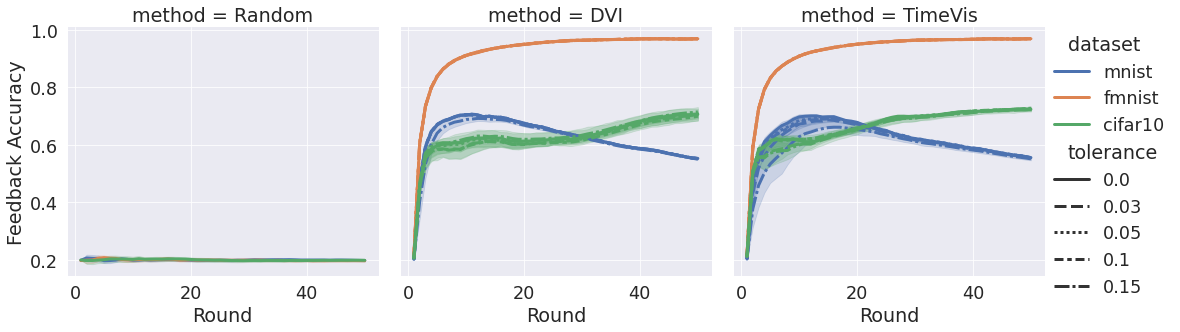

In [16]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_eval = df[(df.task=="feedback")&(df.rate==20)]
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", kind="line", legend="auto")
# sns.move_legend(fg, "center right", bbox_to_anchor=(0.8,1), ncol=9, title=None, frameon=True)
fg.set(xlabel='Round', ylabel='Feedback Accuracy')
fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation_noise_20.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)

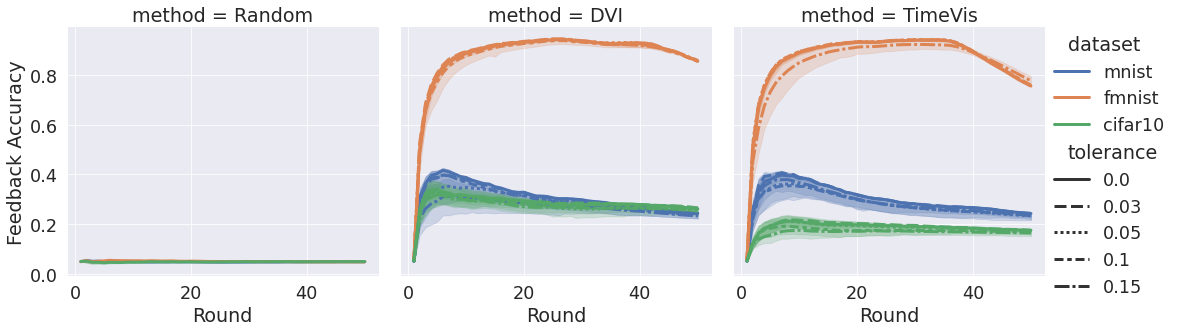

In [17]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_eval = df[(df.task=="feedback")&(df.rate==5)]
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", kind="line", legend="auto")
# sns.move_legend(fg, "center right", bbox_to_anchor=(0.8,1), ncol=9, title=None, frameon=True)
fg.set(xlabel='Round', ylabel='Feedback Accuracy')
fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation_noise_5.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)